In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Dataset
url = 'https://drive.google.com/uc?id=1Pq8uNTIbWyF87j0e2CObf83_4ZCN-3uY'
df = pd.read_csv(url)

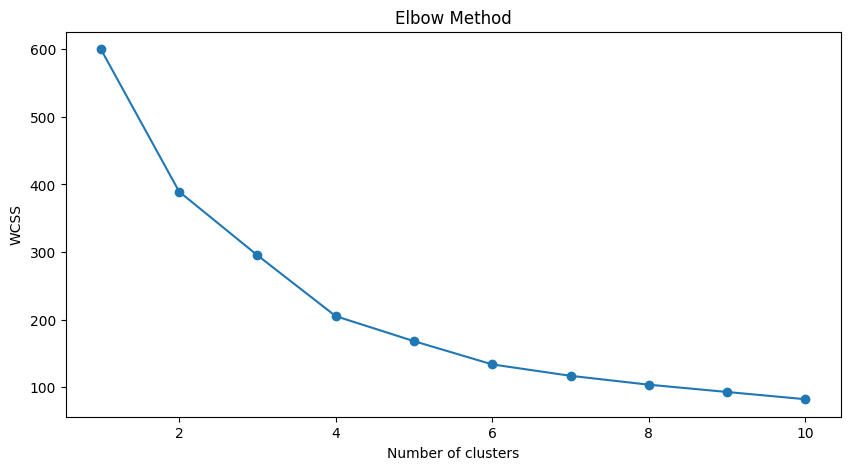

In [2]:
# Step 3: Preprocess the Data
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Determine the Optimal Number of Clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


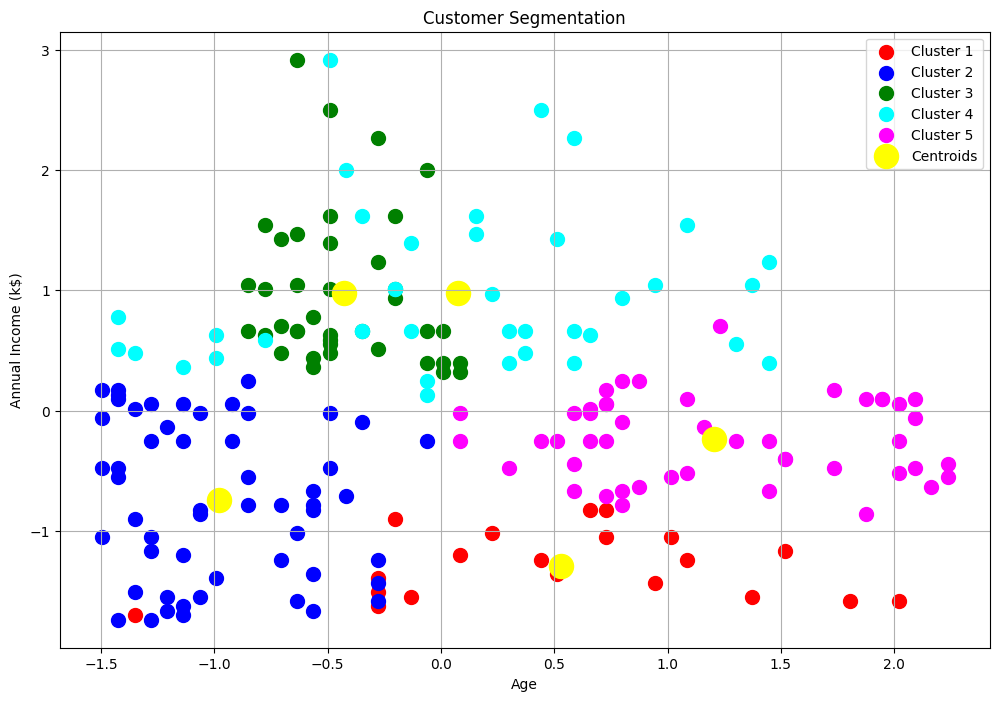

In [3]:
# Step 5: Apply K-Means Clustering with the optimal number of clusters
optimal_clusters = 5  # From the Elbow Method graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 6: Visualize the Clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.grid()
plt.show()



In [4]:
# Step 7: Interpret the Results
df['Cluster'] = y_kmeans

# Display the first few rows of the dataframe with cluster labels
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  


### Question 1: What type of machine learning problem is this?
This is an unsupervised learning problem, as we are grouping the customers into different segments without predefined labels.

### Question 2: What machine learning algorithms are suitable for customer segmentation tasks?
Algorithms suitable for customer segmentation tasks include:
- K-Means Clustering
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- Hierarchical Clustering
- Gaussian Mixture Models

### Question 3: Plot the Answer (hint: use scatter plot)
The scatter plot provided in Step 6 visualizes the clusters formed by the K-Means algorithm. Each color represents a different cluster, and the centroids are marked in yellow.
